DATASET USED: Moody GB, Mark RG. The impact of the MIT-BIH Arrhythmia Database. IEEE Eng in Med and Biol 20(3):45-50 (May-June 2001). (PMID: 11446209)


In [ ]:
import os

for dirname,_, filenames in os.walk('C:\mitdb'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\mitdb\mitbih_test.csv
C:\mitdb\mitbih_train.csv
C:\mitdb\ptbdb_abnormal.csv
C:\mitdb\ptbdb_normal.csv


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from tensorflow import keras
from tensorflow.keras.layers import Conv1D,MaxPool1D,BatchNormalization,Bidirectional,LSTM,Flatten,Input,Dense
from keras import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report , confusion_matrix
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('C:\mitdb\mitbih_train.csv', header=None)
test_data = pd.read_csv('C:\mitdb\mitbih_test.csv', header=None)

In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data[187]=train_data[187].astype(int)
equilibre=train_data[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


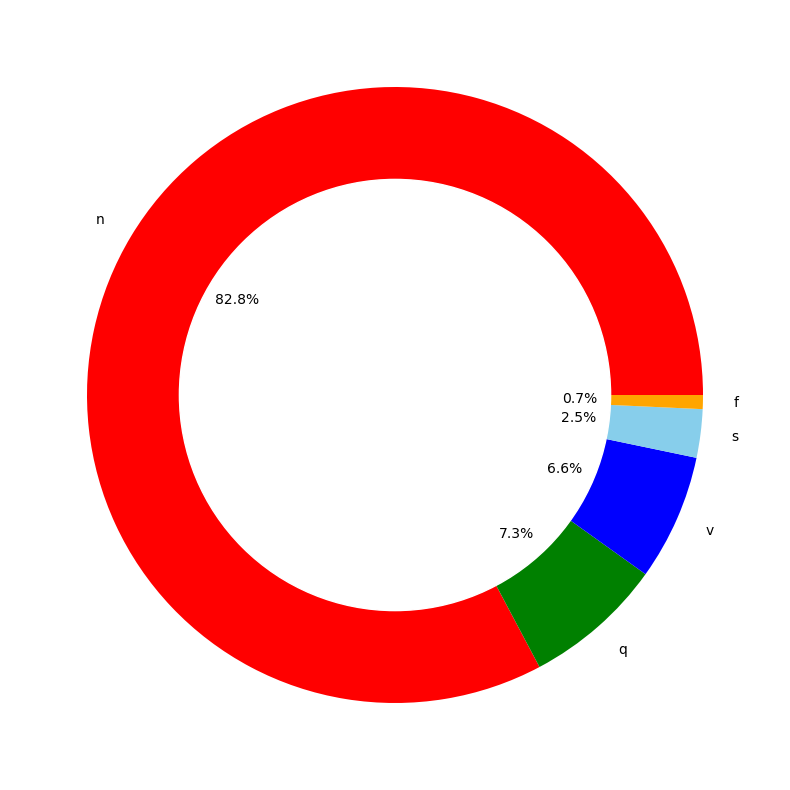

In [ ]:
plt.figure(figsize=(20,10))

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#data is ridiculously unbalanced, so resampling is used

smote = SMOTE (sampling_strategy='all',random_state=42)
x =train_data.drop (columns =187)
y = train_data[187]
x,y = smote.fit_resample (x,y)
train_data = pd.concat([x,y],axis = 1)

In [ ]:
equilibre=train_data[187].value_counts()
print(equilibre)

3    20000
0    20000
4    20000
1    20000
2    20000
Name: 187, dtype: int64


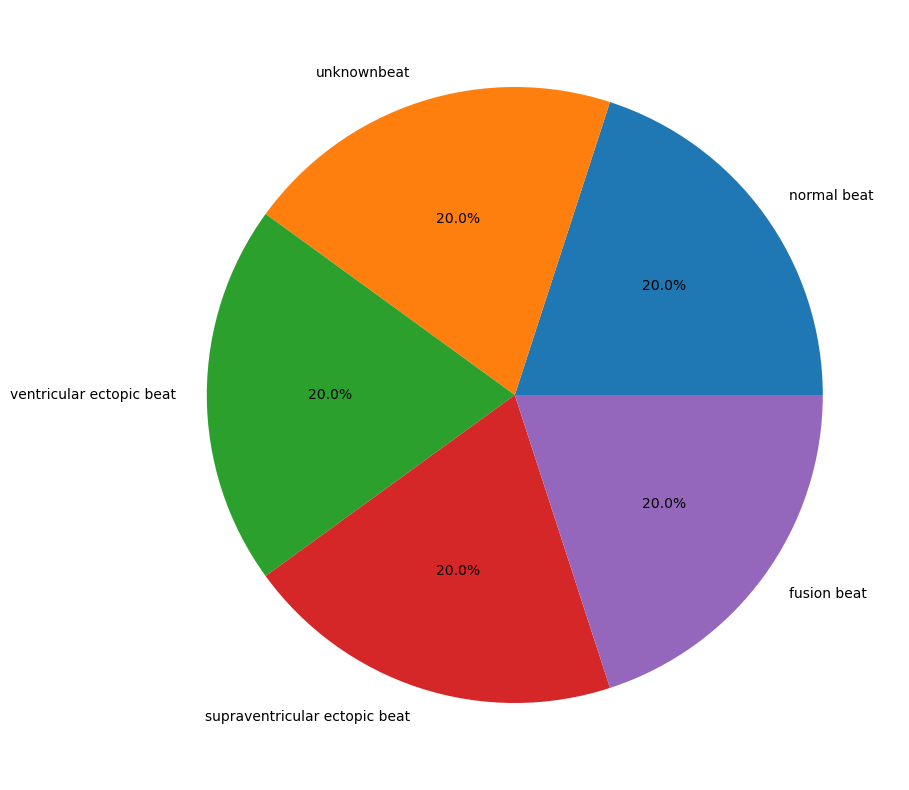

In [ ]:
beats = ['normal beat' ,'unknownbeat','ventricular ectopic beat' , 'supraventricular ectopic beat' , 'fusion beat' ]
plt.figure(figsize=(20,10))
plt.pie (train_data [187].value_counts().values,labels = beats,autopct='%1.1f%%')
plt.show()


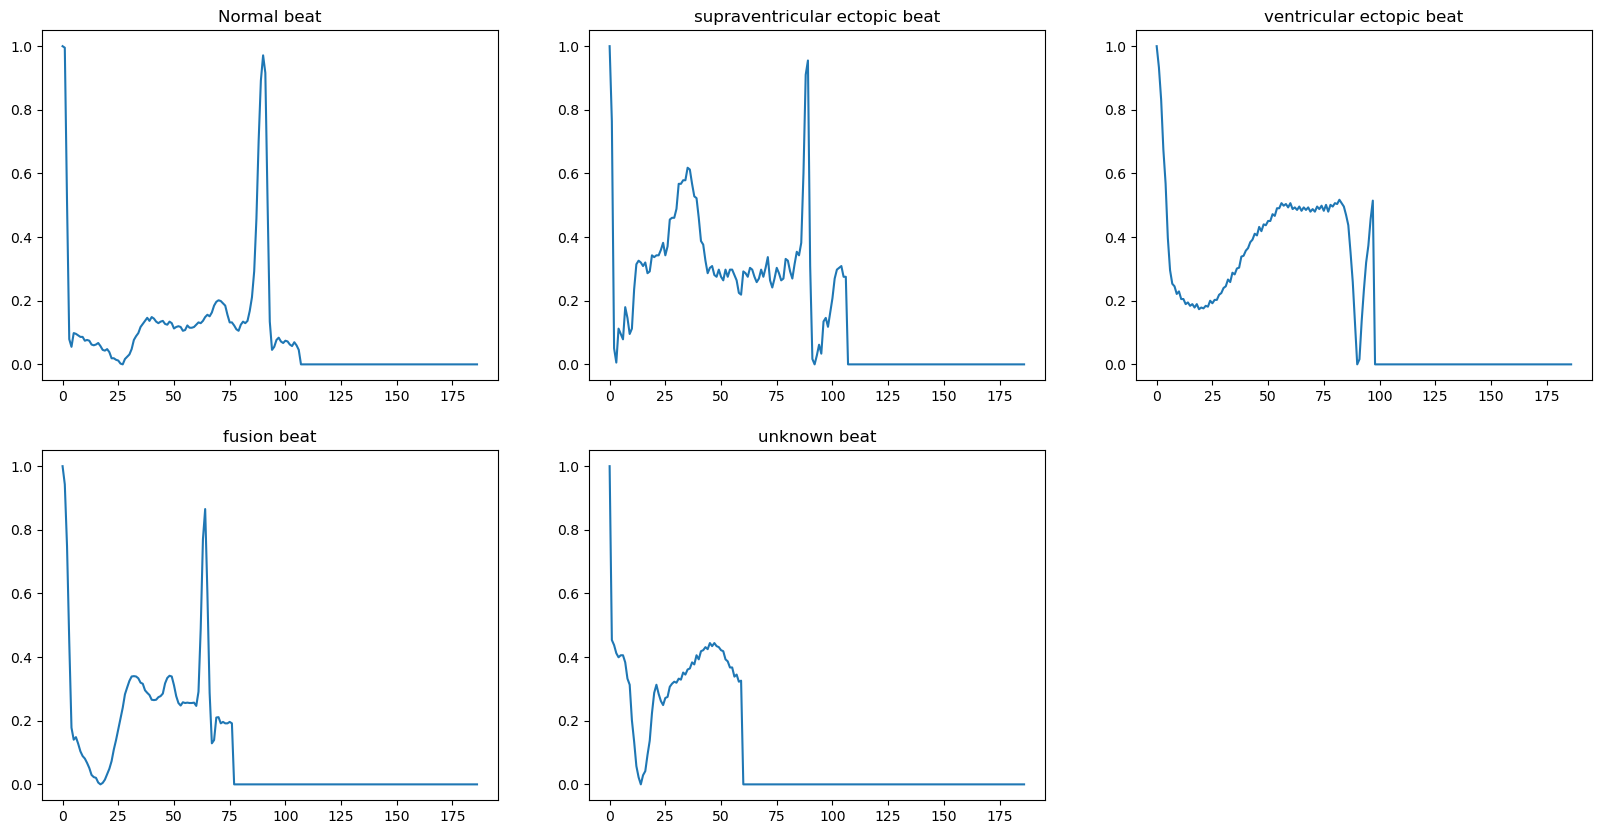

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.plot (range (0,187), (train_data.loc [train_data[187] ==0]).sample(1).iloc [:,:-1].values[0] )
plt.title ('Normal beat')

plt.subplot(2,3,2)
plt.plot ( (train_data.loc [train_data[187] ==1]).sample(1).iloc [:,:-1].values[0])
plt.title ('supraventricular ectopic beat')

plt.subplot(2,3,3)
plt.plot ( (train_data.loc [train_data[187] ==2]).sample(1).iloc [:,:-1].values[0])
plt.title ('ventricular ectopic beat')

plt.subplot(2,3,4)
plt.plot ( (train_data.loc [train_data[187] ==3]).sample(1).iloc [:,:-1].values[0])
plt.title ('fusion beat')

plt.subplot(2,3,5)
plt.plot ( (train_data.loc [train_data[187] ==4]).sample(1).iloc [:,:-1].values[0])
plt.title ('unknown beat')

plt.show()

In [ ]:
train_data = train_data.sample (frac=1) #randomize the train ds

X_train = train_data.iloc [:,:-1].values
X_train = np.expand_dims(X_train,axis = -1)
y_train = to_categorical (train_data.iloc [:,-1].values)

X_test = test_data.iloc [:,:-1].values
X_test = np.expand_dims(X_test,axis = -1)
y_test = to_categorical (test_data.iloc [:,-1].values)

In [ ]:
inputs = Input (shape = (X_train.shape[1],1))
x = Conv1D(filters=64, kernel_size=7, padding="causal",activation="relu")(inputs)
x = BatchNormalization()(x)
x = MaxPool1D(3)(x)
x = Conv1D(filters=64, kernel_size=5, padding="causal",activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPool1D(3)(x)
'''x = Conv1D(filters=64, kernel_size=3, padding="causal",activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPool1D(2)(x)'''
x = keras.layers.Bidirectional( keras.layers.LSTM(64, return_sequences=True))(x)
x = keras.layers.Bidirectional( keras.layers.LSTM(32))(x)
x = Dense (16,activation = 'relu')(x)
x = Dense(5,activation = 'softmax') (x)

In [ ]:
model = Model([inputs], outputs=x)
model.summary()
callbacks = [EarlyStopping(monitor='val_loss', patience=4, restore_best_weights = True,verbose = 1),
             ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)]

model.compile(loss='CategoricalCrossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4),metrics=["accuracy"])
history = model.fit (X_train, y_train,epochs=50,batch_size=32,callbacks = [callbacks],validation_data=(X_test,y_test))
model.load_weights('model.h5')


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 187, 1)]          0         
                                                                 
 conv1d_9 (Conv1D)           (None, 187, 64)           512       
                                                                 
 batch_normalization_8 (Bat  (None, 187, 64)           256       
 chNormalization)                                                
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 62, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 62, 64)            20544     
                                                                 
 batch_normalization_9 (Bat  (None, 62, 64)            256   